## Algo xgboost
><li>install xgboost
><li>load and split data 


In [2]:
##xgboost algorithm
!pip install xgboost

In [1]:
from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier 
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
# define custom class to fix bug in xgboost 1.0.2


In [ ]:
data1=pd.read_csv("dataeyedisease/DATA.csv")
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     60 non-null     int64  
 1   Blink_Rate             60 non-null     int64  
 2   AVG_Inter_Blink_Time   60 non-null     float64
 3   AVG_Blink_Time         60 non-null     float64
 4   Trasition_to_Left_R    60 non-null     int64  
 5   Trasition_to_Left_L    60 non-null     int64  
 6   Trasition_to_Right_R   60 non-null     int64  
 7   Trasition_to_Right_L   60 non-null     int64  
 8   Trasition_to_Centre_R  60 non-null     int64  
 9   Trasition_to_Centre_L  60 non-null     int64  
 10  percentiles_25%        60 non-null     float64
 11  percentiles_50%        60 non-null     float64
 12  percentiles_75%        60 non-null     float64
dtypes: float64(5), int64(8)
memory usage: 6.2 KB


In [6]:
dataset = data1.assign(pathology=[2, 3, 3, 3, 2, 3, 1, 2, 3, 3, 2, 3, 1, 1, 3, 1, 2, 1, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 1, 1, 3, 3, 3, 1, 2, 1, 1, 3, 2, 3, 2,3,3,1,3,1,2,3,3,3,2,1,3,1,3,3])
##dataset.tail()


#### Control if data is balanced

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

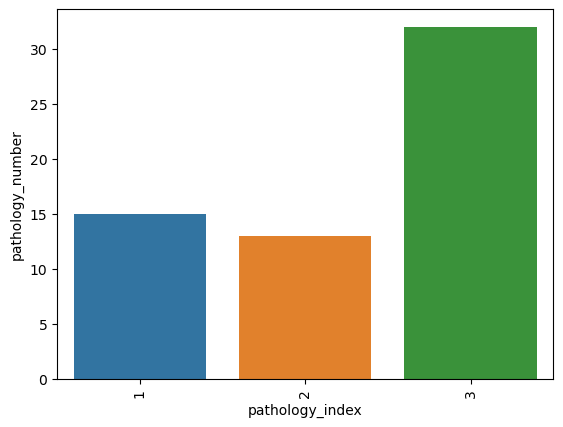

In [7]:

##pair = [1,2]
    
# We only take the two features corresponding to the pair in question...
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values
disease=dataset["pathology"].value_counts()

df=pd.DataFrame({"pathology_index":disease.index,"pathology_number":disease.values})
sns.barplot(x="pathology_index",y="pathology_number",data=df)

plt.xticks(rotation=90)

### splitting data


In [27]:
X=dataset.iloc[:,1:-1]
y=dataset.iloc[:,-1]
dmatrix=xgb.DMatrix(data=X,label=y)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)
print (f"train: {X_train.shape} {X_test.shape}")
print (f"test: {y_train.shape} {y_test.shape}")

train: (48, 12) (12, 12)
test: (48,) (12,)


### define a Model

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y= le.fit_transform(y)
model=XGBClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [17]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.08333333333333333

### k-fold Cross Validation using XGBoost


In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
##kfold = KFold(n_splits=10)
results = cross_val_score(model, X, y, cv=5)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



Accuracy: 41.67% (7.45%)


### Visualize Boosting Trees and Feature Importance
> visualise future importance

In [32]:
feature_importance=model.feature_importances_
feature_importance
##s=0
##for i in feature_importance:
  ##  s=i+s
##print (s)

array([0.12058603, 0.03463081, 0.03830948, 0.06765101, 0.07594575,
       0.14873467, 0.06741475, 0.03736629, 0.04488153, 0.09979488,
       0.14209972, 0.12258502], dtype=float32)

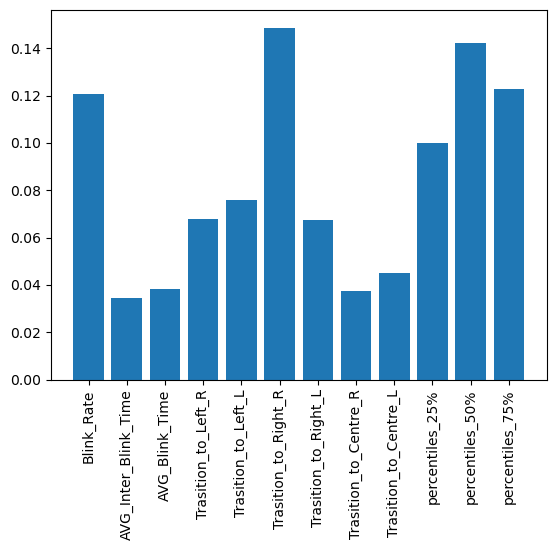

In [129]:
import matplotlib.pyplot as plt
plt.bar(range(len(feature_importance)), feature_importance)
features=dataset.columns[1:13]
plt.xticks(range(len(feature_importance)), features)
plt.xticks(rotation=90)
plt.show()

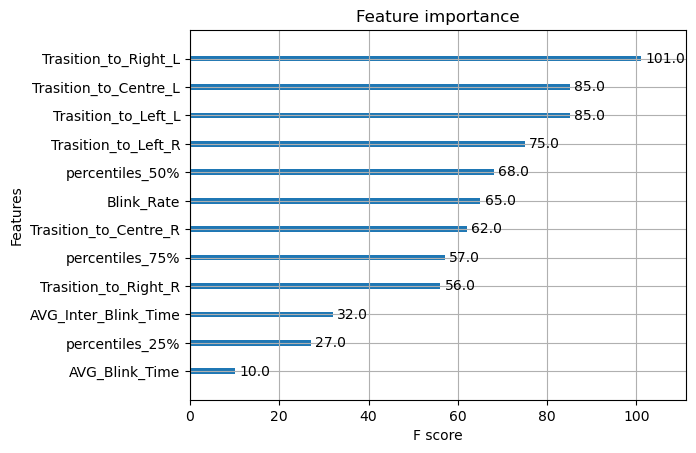

In [12]:
from xgboost import plot_importance
plot_importance(model)
plt.show()

## Feature Selection with XGBoost Feature Importance Scores


In [46]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

thresholds = sort(model.feature_importances_)

#print(thresholds)
sfm = SelectFromModel(model, threshold=0.1, prefit=True)
#
# Transform the training data set
select_X_train = sfm.transform(X_train)
#
# Count of features whose importance value is greater than the threshold value
#
importantFeaturesCount = X_selected.shape[1]
selection_model = XGBClassifier()
selection_model.fit(select_X_train, y_train)
 # eval model
select_X_test = sfm.transform(X_test)
predictions = selection_model.predict(select_X_test)
accuracy = accuracy_score(y_test, predictions)
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (0.1, select_X_train.shape[1], accuracy*100.0))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.100, n=4, Accuracy: 8.33%


## test